<a href="https://colab.research.google.com/github/TheLadyJack/Maxines-portfolio/blob/master/Oil_Price_Inflation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
#Pop in the Brent Oil Prices
uploaded = files.upload()
#And the inflation_Series_report
uploaded = files.upload()
df = pd.read_csv('BrentOilPrices.csv')
df.head()
df.tail()


Saving BrentOilPrices.csv to BrentOilPrices.csv


Saving SeriesReport-20200304155045_ecb26b.xlsx to SeriesReport-20200304155045_ecb26b.xlsx


,Date,Price
8211,"Sep 24, 2019",64.13
8212,"Sep 25, 2019",62.41
8213,"Sep 26, 2019",62.08
8214,"Sep 27, 2019",62.48
8215,"Sep 30, 2019",60.99


In [0]:
df['Date'] = pd.to_datetime(df['Date'])
#Convert to Date_Time

In [4]:
df.head()

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [5]:
df.describe()
#Just glancing

,Price
count,8216.000000
mean,46.332605
std,32.704113
min,9.100000
25%,18.730000
50%,31.260000
75%,67.432500
max,143.950000


In [0]:
df['year'] = df.Date.dt.year
#In this 

In [7]:
df.head()

,Date,Price,year
0,1987-05-20,18.63,1987
1,1987-05-21,18.45,1987
2,1987-05-22,18.55,1987
3,1987-05-25,18.60,1987
4,1987-05-26,18.63,1987


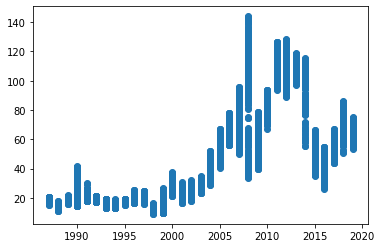

In [8]:
plt.scatter(df.year, df.Price)
plt.show()

In [0]:
#import openpyxl
#from pathlib import Path
#infl = Path('/content/SeriesReport-20200304155045_ecb26b.xlsx')
#df_inf = 


#This is a leftover from when I was trying to import data-set-2 as its native file,
#but then I learned I can cut out the middleman 

In [10]:
df2 = pd.read_excel('/content/SeriesReport-20200304155045_ecb26b.xlsx')
print(df2.shape)
df2.head()

#This, of course, is concerning, let's look at the whole file

(44, 16)


,CPI for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,12-Month Percent Change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df2
#So, looking into it, I've found that the pre-data header has been incorporated into the DF
#and that the information important to us starts on row 10

,CPI for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,12-Month Percent Change,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"All items in U.S. city average, all urban cons...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Area:,U.S. city average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Item:,All items,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Base Period:,1982-84=100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Years:,1987 to 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df2 = df2[10:44]
#Slice away the chaff

In [13]:
df2 = df2.drop(df2.iloc[:, 1:13], axis=1)
df2.head()
#more slicing away

,CPI for All Urban Consumers (CPI-U),Unnamed: 13,Unnamed: 14,Unnamed: 15
10,Year,Annual,HALF1,HALF2
11,1987,3.6,3,4.4
12,1988,4.1,3.9,4.2
13,1989,4.8,5.1,4.7
14,1990,5.4,4.9,5.8


In [14]:
df2 = df2.drop(['Unnamed: 14','Unnamed: 15'], axis=1)
df2.head()
#this is all the data we need from this, now to rename columns and merge with df1

,CPI for All Urban Consumers (CPI-U),Unnamed: 13
10,Year,Annual
11,1987,3.6
12,1988,4.1
13,1989,4.8
14,1990,5.4


In [15]:
df2.columns = ['year', 'Annual Inflation Rate']
df2 = df2[1:]
df2.head()

,year,Annual Inflation Rate
11,1987,3.6
12,1988,4.1
13,1989,4.8
14,1990,5.4
15,1991,4.2


In [16]:
df2 = df2.reset_index()
df2 = df2.drop(['index'], axis=1)
df2.head()

,year,Annual Inflation Rate
0,1987,3.6
1,1988,4.1
2,1989,4.8
3,1990,5.4
4,1991,4.2


In [0]:
df3 = pd.merge(df, df2, how='outer')

In [18]:
df3.head()
#this is my primary DF, but I might add a third data set

,Date,Price,year,Annual Inflation Rate
0,1987-05-20,18.63,1987,3.6
1,1987-05-21,18.45,1987,3.6
2,1987-05-22,18.55,1987,3.6
3,1987-05-25,18.60,1987,3.6
4,1987-05-26,18.63,1987,3.6


In [0]:
#Ok, how closely does oil price match inflation?

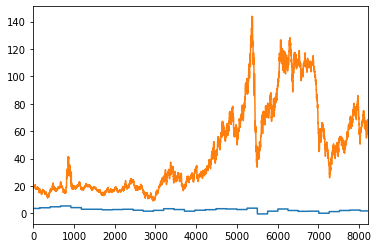

In [20]:
df3['Annual Inflation Rate'].plot()
df3['Price'].plot()

plt.show()

In [0]:
#adding a new feature that is the cumulative inflation
df2['Cum-infl'] = df2['Annual Inflation Rate'].cumsum()

In [22]:
df2.head()
#I really should've done this before the merge, but cie la vie

,year,Annual Inflation Rate,Cum-infl
0,1987,3.6,3.6
1,1988,4.1,7.7
2,1989,4.8,12.5
3,1990,5.4,17.9
4,1991,4.2,22.1


In [23]:
df3 = pd.merge(df, df2, how='outer')
df3.head()

,Date,Price,year,Annual Inflation Rate,Cum-infl
0,1987-05-20,18.63,1987,3.6,3.6
1,1987-05-21,18.45,1987,3.6,3.6
2,1987-05-22,18.55,1987,3.6,3.6
3,1987-05-25,18.60,1987,3.6,3.6
4,1987-05-26,18.63,1987,3.6,3.6


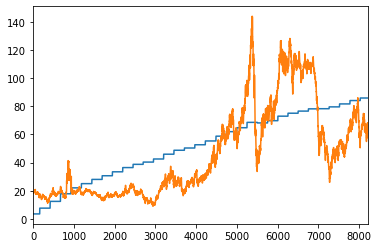

In [24]:
df3['Cum-infl'].plot()
df3['Price'].plot()

plt.show()

In [45]:
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df4 = df3
df4 = df4.drop(['Date'], axis=1)
df4.head()
means = means = np.mean(df4.T, axis=1)
#I'm still not super sure why this needs to be transposed, but whatever
df4 = df4 - means
std = np.std(df4.T, axis=1)
df4 = df4 / std
df4.year = df.year
df4.head()

,Price,year,Annual Inflation Rate,Cum-infl
0,-0.847119,1987,0.840992,-2.06724
1,-0.852624,1987,0.840992,-2.06724
2,-0.849566,1987,0.840992,-2.06724
3,-0.848037,1987,0.840992,-2.06724
4,-0.847119,1987,0.840992,-2.06724


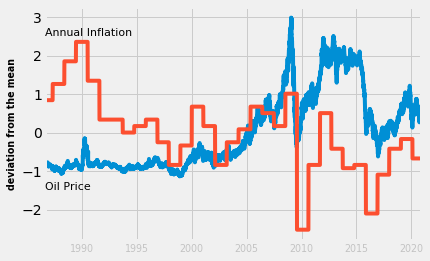

In [104]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.set_xticks([800,2000,3200,4400,5600,6800,8000])
ax.set_xticklabels([1990,1995,2000,2005,2010,2015,2020], fontsize=9.5, fontweight='light', color='#C3C3C3')
ax.set_ylabel("deviation from the mean", fontsize=9.5, fontweight='semibold')
df4['Price'].plot()
df4['Annual Inflation Rate'].plot()
ax.text(s='Annual Inflation', fontsize=11, x=1,y=2.5)
ax.text(s='Oil Price', fontsize=11, x=1, y=-1.5)
plt.show()

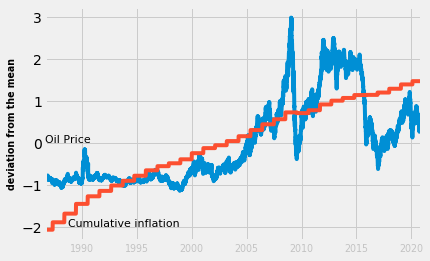

In [111]:
fig, ax = plt.subplots()
ax.set_xticks([800,2000,3200,4400,5600,6800,8000])
ax.set_xticklabels([1990,1995,2000,2005,2010,2015,2020], fontsize=9.5, fontweight='light', color='#C3C3C3')
ax.set_ylabel("deviation from the mean", fontsize=9.5, fontweight='semibold')
ax.text(s='Cumulative inflation', fontsize=11, x=500,y=-2)
ax.text(s='Oil Price', fontsize=11, x=1, y=0)

df4.Price.plot()
df4['Cum-infl'].plot()
plt.show()

,Price,year,Annual Inflation Rate,Cum-infl
8211,0.544228,2019,-0.673144,1.47118
8212,0.491632,2019,-0.673144,1.47118
8213,0.481540,2019,-0.673144,1.47118
8214,0.493772,2019,-0.673144,1.47118
8215,0.448209,2019,-0.673144,1.47118


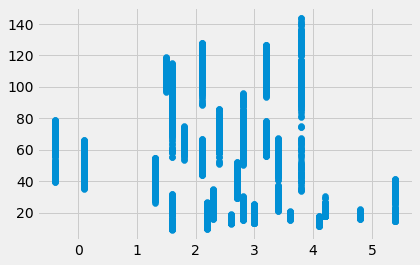

In [112]:
#fig, ax = plt.subplots()


#thinking about it, This graph needs its own feature of 'price change'

#plt.scatter(df3['Annual Inflation Rate'], df3['Price'])
#plt.show()

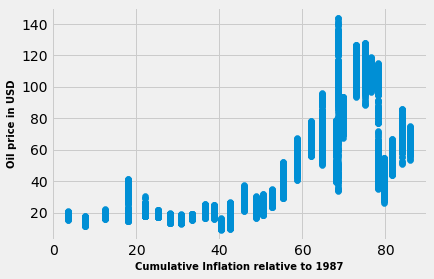

In [118]:
fig, ax = plt.subplots()
ax.set_ylabel('Oil price in USD',fontsize=10, fontweight='semibold')
ax.set_xlabel('Cumulative Inflation relative to 1987', fontsize=10, fontweight='semibold')
plt.scatter(df3['Cum-infl'], df3['Price'])
plt.show()

In [80]:
df4.corr()
#why does this exclude two columns???

,Price,year
Price,1.000000,0.743239
year,0.743239,1.000000
